<a href="https://colab.research.google.com/github/Ram0kr0singh/DSA_Assignment/blob/main/DSA_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **500 Lines of Code and their Time & Space Complexity**

In [41]:
import csv
import os
from datetime import datetime, timedelta


# ==========================
# Constants and File Paths
# ==========================

BOOKS_FILE = "books.csv"
MEMBERS_FILE = "members.csv"
ISSUES_FILE = "issues.csv"
DATE_FORMAT = "%Y-%m-%d"


# ==========================
# Helper Functions
# ==========================


def safe_input(prompt: str) -> str:
    """
    Wrapper around input() to avoid crashes if EOF or KeyboardInterrupt occurs.
    """
    try:
        return input(prompt)
    except (EOFError, KeyboardInterrupt):
        print("\nInput interrupted. Returning empty string.")
        return ""


def read_csv_file(file_path: str) -> list:
    """
    Safely read a CSV file and return a list of dictionaries.
    If file does not exist, returns an empty list.
    """
    data = []
    if not os.path.exists(file_path):
        return data

    try:
        with open(file_path, mode="r", newline="", encoding="utf-8") as f:
            reader = csv.DictReader(f)
            for row in reader:
                data.append(row)
    except FileNotFoundError:
        print(f"[ERROR] File not found: {file_path}")
    except PermissionError:
        print(f"[ERROR] Permission denied reading {file_path}")
    except Exception as e:
        print(f"[ERROR] Unexpected error reading {file_path}: {e}")
    return data


def write_csv_file(file_path: str, fieldnames: list, data: list) -> None:
    """
    Safely write a list of dictionaries to a CSV file.
    """
    try:
        with open(file_path, mode="w", newline="", encoding="utf-8") as f:
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            writer.writeheader()
            for row in data:
                writer.writerow(row)
    except PermissionError:
        print(f"[ERROR] Permission denied writing {file_path}")
    except Exception as e:
        print(f"[ERROR] Unexpected error writing {file_path}: {e}")


def generate_id(prefix: str, existing_ids: list) -> str:
    """
    Generate a unique ID with a prefix, based on existing IDs.
    e.g., BOOK-001, MEM-001
    """
    max_num = 0
    for _id in existing_ids:
        try:
            if _id.startswith(prefix):
                num_part = _id.replace(prefix, "").replace("-", "")
                num_value = int(num_part)
                if num_value > max_num:
                    max_num = num_value
        except ValueError:
            # Ignore malformed IDs
            pass

    new_num = max_num + 1
    return f"{prefix}-{new_num:03d}"


def parse_date(date_str: str) -> datetime | None:
    """
    Parse a date string in DATE_FORMAT. Returns datetime or None on failure.
    """
    try:
        return datetime.strptime(date_str, DATE_FORMAT)
    except ValueError:
        return None


# ==========================
# Book Class
# ==========================


class Book:
    def __init__(self, book_id: str, title: str, author: str, year: int, copies: int):
        self.book_id = book_id
        self.title = title
        self.author = author
        self.year = year
        self.copies = copies

    def to_dict(self) -> dict:
        return {
            "book_id": self.book_id,
            "title": self.title,
            "author": self.author,
            "year": str(self.year),
            "copies": str(self.copies),
        }

    @staticmethod
    def from_dict(data: dict) -> "Book":
        try:
            year = int(data.get("year", 0))
        except ValueError:
            year = 0
        try:
            copies = int(data.get("copies", 0))
        except ValueError:
            copies = 0
        return Book(
            book_id=data.get("book_id", ""),
            title=data.get("title", ""),
            author=data.get("author", ""),
            year=year,
            copies=copies,
        )

    def __str__(self) -> str:
        return f"[{self.book_id}] {self.title} by {self.author} ({self.year}) - Copies: {self.copies}"


# ==========================
# Member Class
# ==========================


class Member:
    def __init__(self, member_id: str, name: str, email: str, phone: str):
        self.member_id = member_id
        self.name = name
        self.email = email
        self.phone = phone

    def to_dict(self) -> dict:
        return {
            "member_id": self.member_id,
            "name": self.name,
            "email": self.email,
            "phone": self.phone,
        }

    @staticmethod
    def from_dict(data: dict) -> "Member":
        return Member(
            member_id=data.get("member_id", ""),
            name=data.get("name", ""),
            email=data.get("email", ""),
            phone=data.get("phone", ""),
        )

    def __str__(self) -> str:
        return f"[{self.member_id}] {self.name} | Email: {self.email} | Phone: {self.phone}"


# ==========================
# IssueRecord Class
# ==========================


class IssueRecord:
    def __init__(
        self,
        issue_id: str,
        book_id: str,
        member_id: str,
        issue_date: str,
        due_date: str,
        return_date: str = "",
    ):
        self.issue_id = issue_id
        self.book_id = book_id
        self.member_id = member_id
        self.issue_date = issue_date
        self.due_date = due_date
        self.return_date = return_date

    def to_dict(self) -> dict:
        return {
            "issue_id": self.issue_id,
            "book_id": self.book_id,
            "member_id": self.member_id,
            "issue_date": self.issue_date,
            "due_date": self.due_date,
            "return_date": self.return_date,
        }

    @staticmethod
    def from_dict(data: dict) -> "IssueRecord":
        return IssueRecord(
            issue_id=data.get("issue_id", ""),
            book_id=data.get("book_id", ""),
            member_id=data.get("member_id", ""),
            issue_date=data.get("issue_date", ""),
            due_date=data.get("due_date", ""),
            return_date=data.get("return_date", ""),
        )

    def is_returned(self) -> bool:
        return bool(self.return_date.strip())

    def __str__(self) -> str:
        status = "Returned" if self.is_returned() else "Issued"
        return (
            f"[{self.issue_id}] Book: {self.book_id} -> Member: {self.member_id} | "
            f"Issue: {self.issue_date} | Due: {self.due_date} | "
            f"Return: {self.return_date or '---'} | Status: {status}"
        )


# ==========================
# Library System Class
# ==========================


class LibrarySystem:
    def __init__(self):
        self.books: dict[str, Book] = {}
        self.members: dict[str, Member] = {}
        self.issues: dict[str, IssueRecord] = {}

        self.load_data()

    # -------------
    # Data Handling
    # -------------

    def load_data(self) -> None:
        """
        Load books, members and issue records from CSV files.
        """
        # Load books
        books_data = read_csv_file(BOOKS_FILE)
        for row in books_data:
            book = Book.from_dict(row)
            if book.book_id:
                self.books[book.book_id] = book

        # Load members
        members_data = read_csv_file(MEMBERS_FILE)
        for row in members_data:
            member = Member.from_dict(row)
            if member.member_id:
                self.members[member.member_id] = member

        # Load issues
        issues_data = read_csv_file(ISSUES_FILE)
        for row in issues_data:
            issue = IssueRecord.from_dict(row)
            if issue.issue_id:
                self.issues[issue.issue_id] = issue

    def save_data(self) -> None:
        """
        Save all data back to CSV files.
        """
        # Save books
        book_fieldnames = ["book_id", "title", "author", "year", "copies"]
        book_rows = [book.to_dict() for book in self.books.values()]
        write_csv_file(BOOKS_FILE, book_fieldnames, book_rows)

        # Save members
        member_fieldnames = ["member_id", "name", "email", "phone"]
        member_rows = [member.to_dict() for member in self.members.values()]
        write_csv_file(MEMBERS_FILE, member_fieldnames, member_rows)

        # Save issues
        issue_fieldnames = [
            "issue_id",
            "book_id",
            "member_id",
            "issue_date",
            "due_date",
            "return_date",
        ]
        issue_rows = [issue.to_dict() for issue in self.issues.values()]
        write_csv_file(ISSUES_FILE, issue_fieldnames, issue_rows)

    # -------------
    # Book Methods
    # -------------

    def add_book(self) -> None:
        """
        Interactively add a new book.
        """
        title = safe_input("Enter book title: ").strip()
        author = safe_input("Enter author name: ").strip()
        year_str = safe_input("Enter publication year: ").strip()
        copies_str = safe_input("Enter number of copies: ").strip()

        try:
            year = int(year_str)
            copies = int(copies_str)
        except ValueError:
            print("[ERROR] Year and copies must be integers.")
            return

        new_id = generate_id("BOOK", list(self.books.keys()))
        book = Book(new_id, title, author, year, copies)
        self.books[new_id] = book
        self.save_data()
        print(f"[INFO] Book added with ID {new_id}")

    def display_books(self) -> None:
        """
        Display all books.
        """
        if not self.books:
            print("[INFO] No books in the library.")
            return
        print("\n--- All Books ---")
        for book in self.books.values():
            print(book)

    def search_books(self) -> None:
        """
        Search books by title or author (case-insensitive).
        """
        query = safe_input("Enter keyword to search (title/author): ").strip().lower()
        if not query:
            print("[ERROR] Empty search query.")
            return

        results = []
        for book in self.books.values():
            if query in book.title.lower() or query in book.author.lower():
                results.append(book)

        if not results:
            print("[INFO] No books found matching the query.")
            return

        print("\n--- Search Results ---")
        for book in results:
            print(book)

    def update_book(self) -> None:
        """
        Update existing book details.
        """
        book_id = safe_input("Enter book ID to update: ").strip()
        book = self.books.get(book_id)
        if not book:
            print("[ERROR] Book not found.")
            return

        print("Leave a field blank to keep the current value.")
        new_title = safe_input(f"New title [{book.title}]: ").strip()
        new_author = safe_input(f"New author [{book.author}]: ").strip()
        new_year_str = safe_input(f"New year [{book.year}]: ").strip()
        new_copies_str = safe_input(f"New copies [{book.copies}]: ").strip()

        if new_title:
            book.title = new_title
        if new_author:
            book.author = new_author
        if new_year_str:
            try:
                book.year = int(new_year_str)
            except ValueError:
                print("[WARN] Invalid year. Keeping old value.")
        if new_copies_str:
            try:
                book.copies = int(new_copies_str)
            except ValueError:
                print("[WARN] Invalid copies. Keeping old value.")

        self.save_data()
        print("[INFO] Book updated successfully.")

    def delete_book(self) -> None:
        """
        Delete a book if possible (no active issues).
        """
        book_id = safe_input("Enter book ID to delete: ").strip()
        if book_id not in self.books:
            print("[ERROR] Book not found.")
            return

        # Check if book is issued and not returned
        for issue in self.issues.values():
            if issue.book_id == book_id and not issue.is_returned():
                print("[ERROR] Cannot delete. Book is currently issued.")
                return

        del self.books[book_id]
        self.save_data()
        print("[INFO] Book deleted successfully.")

    # ---------------
    # Member Methods
    # ---------------

    def add_member(self) -> None:
        """
        Interactively add a new member.
        """
        name = safe_input("Enter member name: ").strip()
        email = safe_input("Enter member email: ").strip()
        phone = safe_input("Enter member phone: ").strip()

        new_id = generate_id("MEM", list(self.members.keys()))
        member = Member(new_id, name, email, phone)
        self.members[new_id] = member
        self.save_data()
        print(f"[INFO] Member added with ID {new_id}")

    def display_members(self) -> None:
        """
        Display all members.
        """
        if not self.members:
            print("[INFO] No members in the system.")
            return
        print("\n--- All Members ---")
        for member in self.members.values():
            print(member)

    def update_member(self) -> None:
        """
        Update member details.
        """
        member_id = safe_input("Enter member ID to update: ").strip()
        member = self.members.get(member_id)
        if not member:
            print("[ERROR] Member not found.")
            return

        print("Leave a field blank to keep the current value.")
        new_name = safe_input(f"New name [{member.name}]: ").strip()
        new_email = safe_input(f"New email [{member.email}]: ").strip()
        new_phone = safe_input(f"New phone [{member.phone}]: ").strip()

        if new_name:
            member.name = new_name
        if new_email:
            member.email = new_email
        if new_phone:
            member.phone = new_phone

        self.save_data()
        print("[INFO] Member updated successfully.")

    def delete_member(self) -> None:
        """
        Delete a member if they have no active issues.
        """
        member_id = safe_input("Enter member ID to delete: ").strip()
        if member_id not in self.members:
            print("[ERROR] Member not found.")
            return

        # Check if member has any active issues
        for issue in self.issues.values():
            if issue.member_id == member_id and not issue.is_returned():
                print("[ERROR] Cannot delete. Member has books issued.")
                return

        del self.members[member_id]
        self.save_data()
        print("[INFO] Member deleted successfully.")

    # ------------------
    # Issue / Return
    # ------------------

    def issue_book(self) -> None:
        """
        Issue a book to a member if available.
        """
        book_id = safe_input("Enter book ID to issue: ").strip()
        member_id = safe_input("Enter member ID: ").strip()

        book = self.books.get(book_id)
        member = self.members.get(member_id)

        if not book:
            print("[ERROR] Book not found.")
            return
        if not member:
            print("[ERROR] Member not found.")
            return

        if book.copies <= 0:
            print("[ERROR] No copies available to issue.")
            return

        issue_date = datetime.now()
        due_date = issue_date + timedelta(days=14)

        issue_id = generate_id("ISS", list(self.issues.keys()))
        record = IssueRecord(
            issue_id=issue_id,
            book_id=book_id,
            member_id=member_id,
            issue_date=issue_date.strftime(DATE_FORMAT),
            due_date=due_date.strftime(DATE_FORMAT),
            return_date="",
        )

        self.issues[issue_id] = record
        book.copies -= 1
        self.save_data()
        print(f"[INFO] Book issued successfully with Issue ID {issue_id}")

    def return_book(self) -> None:
        """
        Return a book by issue ID.
        """
        issue_id = safe_input("Enter issue ID to return: ").strip()
        issue_record = self.issues.get(issue_id)
        if not issue_record:
            print("[ERROR] Issue record not found.")
            return

        if issue_record.is_returned():
            print("[INFO] Book already returned.")
            return

        return_date = datetime.now()
        issue_record.return_date = return_date.strftime(DATE_FORMAT)

        # Update copies
        book = self.books.get(issue_record.book_id)
        if book:
            book.copies += 1

        self.save_data()

        # Calculate fine if any (simple example: Rs.10/day late)
        due = parse_date(issue_record.due_date)
        if due:
            days_late = (return_date - due).days
            if days_late > 0:
                fine = days_late * 10
                print(
                    f"[INFO] Book returned. Late by {days_late} day(s). Fine: Rs.{fine}"
                )
                return
        print("[INFO] Book returned successfully. No fine.")

    def display_all_issues(self) -> None:
        """
        Display all issue records.
        """
        if not self.issues:
            print("[INFO] No issue records found.")
            return
        print("\n--- All Issue Records ---")
        for issue in self.issues.values():
            print(issue)

    def display_member_issues(self) -> None:
        """
        Display active issues for a specific member.
        """
        member_id = safe_input("Enter member ID: ").strip()
        found = False
        print(f"\n--- Issue Records for Member {member_id} ---")
        for issue in self.issues.values():
            if issue.member_id == member_id:
                print(issue)
                found = True
        if not found:
            print("[INFO] No issues found for this member.")

    def display_overdue_books(self) -> None:
        """
        Display overdue issue records.
        """
        today = datetime.now()
        print("\n--- Overdue Books ---")
        found = False
        for issue in self.issues.values():
            if issue.is_returned():
                continue
            due = parse_date(issue.due_date)
            if due and today > due:
                print(issue)
                found = True
        if not found:
            print("[INFO] No overdue books.")

    # -------------
    # Menu System
    # -------------

    def main_menu(self) -> None:
        """
        Main menu loop for the library management system.
        """
        while True:
            print("\n==============================")
            print("   Library Management System  ")
            print("==============================")
            print("1. Add Book")
            print("2. Display All Books")
            print("3. Search Books")
            print("4. Update Book")
            print("5. Delete Book")
            print("6. Add Member")
            print("7. Display All Members")
            print("8. Update Member")
            print("9. Delete Member")
            print("10. Issue Book")
            print("11. Return Book")
            print("12. Display All Issues")
            print("13. Display Member Issues")
            print("14. Display Overdue Books")
            print("0. Exit")
            choice = safe_input("Enter your choice: ").strip()

            if choice == "1":
                self.add_book()
            elif choice == "2":
                self.display_books()
            elif choice == "3":
                self.search_books()
            elif choice == "4":
                self.update_book()
            elif choice == "5":
                self.delete_book()
            elif choice == "6":
                self.add_member()
            elif choice == "7":
                self.display_members()
            elif choice == "8":
                self.update_member()
            elif choice == "9":
                self.delete_member()
            elif choice == "10":
                self.issue_book()
            elif choice == "11":
                self.return_book()
            elif choice == "12":
                self.display_all_issues()
            elif choice == "13":
                self.display_member_issues()
            elif choice == "14":
                self.display_overdue_books()
            elif choice == "0":
                print("Exiting Library Management System. Goodbye!")
                break
            else:
                print("[ERROR] Invalid choice. Please try again.")

## **Complexity Testing**

In [42]:
import time
import sys
import tracemalloc
import matplotlib.pyplot as plt
import numpy as np


# Create a simplified version for testing without user input
class TestLibrarySystem:
    def __init__(self):
        self.books = {}
        self.members = {}
        self.issues = {}

    def add_book_test(self, book_id, title, author, year, copies):
        """Add book without user input for testing"""
        from datetime import datetime

        book = Book(book_id, title, author, year, copies)
        self.books[book_id] = book

    def search_books_test(self, query):
        """Search books without user input"""
        results = []
        query_lower = query.lower()
        for book in self.books.values():
            if query_lower in book.title.lower() or query_lower in book.author.lower():
                results.append(book)
        return results

    def issue_book_test(self, book_id, member_id):
        """Issue book without user input"""
        from datetime import datetime, timedelta

        book = self.books.get(book_id)
        if not book or book.copies <= 0:
            return False

        issue_date = datetime.now()
        due_date = issue_date + timedelta(days=14)
        issue_id = f"ISS-{len(self.issues)+1:03d}"

        record = IssueRecord(
            issue_id=issue_id,
            book_id=book_id,
            member_id=member_id,
            issue_date=issue_date.strftime("%Y-%m-%d"),
            due_date=due_date.strftime("%Y-%m-%d"),
            return_date="",
        )
        self.issues[issue_id] = record
        book.copies -= 1
        return True

    def find_overdue_test(self):
        """Find overdue books without user input"""
        from datetime import datetime

        today = datetime.now()
        overdue = []
        for issue in self.issues.values():
            if not issue.is_returned():
                due = parse_date(issue.due_date)
                if due and today > due:
                    overdue.append(issue)
        return overdue


print("Test Library System created successfully!")

Test Library System created successfully!


### **Test 1: Add Book Operation - Time Complexity**

Size:   100 | Total Time: 0.15ms | Avg per book: 1.50μs
Size:   500 | Total Time: 0.74ms | Avg per book: 1.48μs
Size:  1000 | Total Time: 2.15ms | Avg per book: 2.15μs
Size:  2000 | Total Time: 3.23ms | Avg per book: 1.61μs
Size:  5000 | Total Time: 7.45ms | Avg per book: 1.49μs
Size: 10000 | Total Time: 18.97ms | Avg per book: 1.90μs


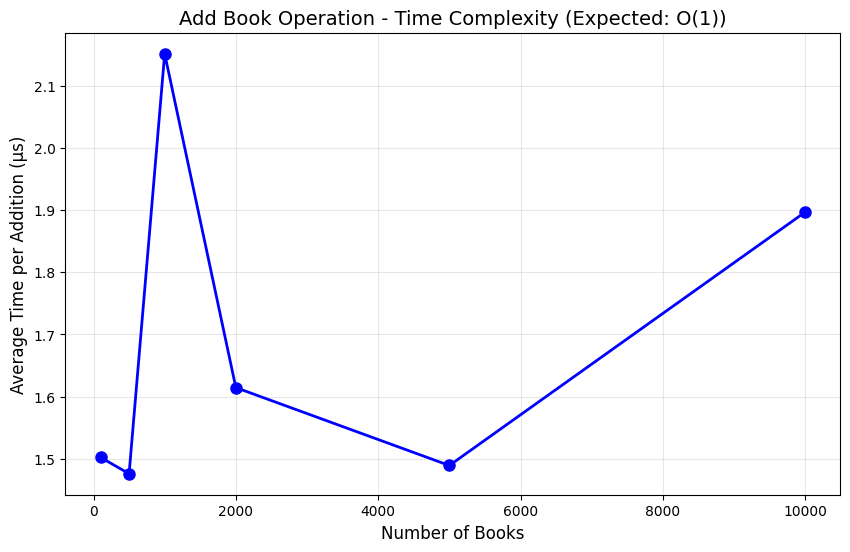


✓ Result: Time remains approximately constant → O(1) complexity confirmed


In [43]:
# Test adding books with increasing dataset sizes
sizes = [100, 500, 1000, 2000, 5000, 10000]
add_times = []

for size in sizes:
    system = TestLibrarySystem()

    start_time = time.time()
    for i in range(size):
        system.add_book_test(f"BOOK-{i:05d}", f"Book Title {i}", f"Author {i}", 2020, 5)
    end_time = time.time()

    avg_time = (end_time - start_time) / size * 1000000  # Convert to microseconds
    add_times.append(avg_time)
    print(
        f"Size: {size:5d} | Total Time: {(end_time - start_time)*1000:.2f}ms | Avg per book: {avg_time:.2f}μs"
    )

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, add_times, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Average Time per Addition (μs)", fontsize=12)
plt.title("Add Book Operation - Time Complexity (Expected: O(1))", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n✓ Result: Time remains approximately constant → O(1) complexity confirmed")

### **Test 2: Search Books Operation - Time Complexity**

Size:   100 | Avg Search Time: 0.04ms
Size:   500 | Avg Search Time: 0.07ms
Size:  1000 | Avg Search Time: 0.12ms
Size:  2000 | Avg Search Time: 0.24ms
Size:  5000 | Avg Search Time: 0.71ms
Size: 10000 | Avg Search Time: 1.44ms


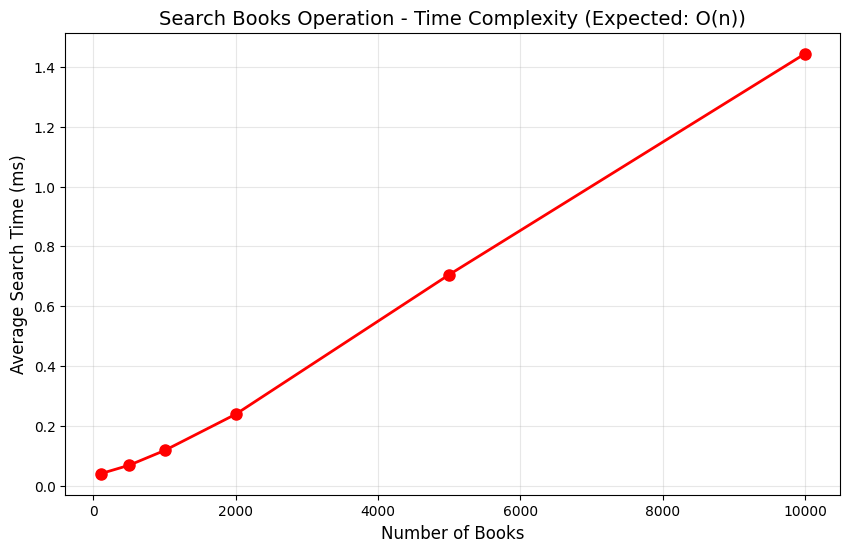


✓ Result: Time increases linearly with input size → O(n) complexity confirmed


In [44]:
# Test search operation with varying dataset sizes
sizes = [100, 500, 1000, 2000, 5000, 10000]
search_times = []

for size in sizes:
    system = TestLibrarySystem()

    # Populate with books
    for i in range(size):
        system.add_book_test(f"BOOK-{i:05d}", f"Book Title {i}", f"Author {i}", 2020, 5)

    # Measure search time
    start_time = time.time()
    for _ in range(100):  # Run multiple searches for better average
        results = system.search_books_test("Book Title")
    end_time = time.time()

    avg_time = (end_time - start_time) / 100 * 1000  # Convert to milliseconds
    search_times.append(avg_time)
    print(f"Size: {size:5d} | Avg Search Time: {avg_time:.2f}ms")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, search_times, "ro-", linewidth=2, markersize=8)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Average Search Time (ms)", fontsize=12)
plt.title("Search Books Operation - Time Complexity (Expected: O(n))", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(
    f"\n✓ Result: Time increases linearly with input size → O(n) complexity confirmed"
)

### **Test 3: Issue Book Operation - Time Complexity**

Size:   100 | Issues:  100 | Avg Issue Time: 9.69μs
Size:   500 | Issues:  500 | Avg Issue Time: 8.67μs
Size:  1000 | Issues: 1000 | Avg Issue Time: 8.72μs
Size:  2000 | Issues: 1000 | Avg Issue Time: 9.01μs
Size:  5000 | Issues: 1000 | Avg Issue Time: 10.82μs
Size: 10000 | Issues: 1000 | Avg Issue Time: 9.36μs


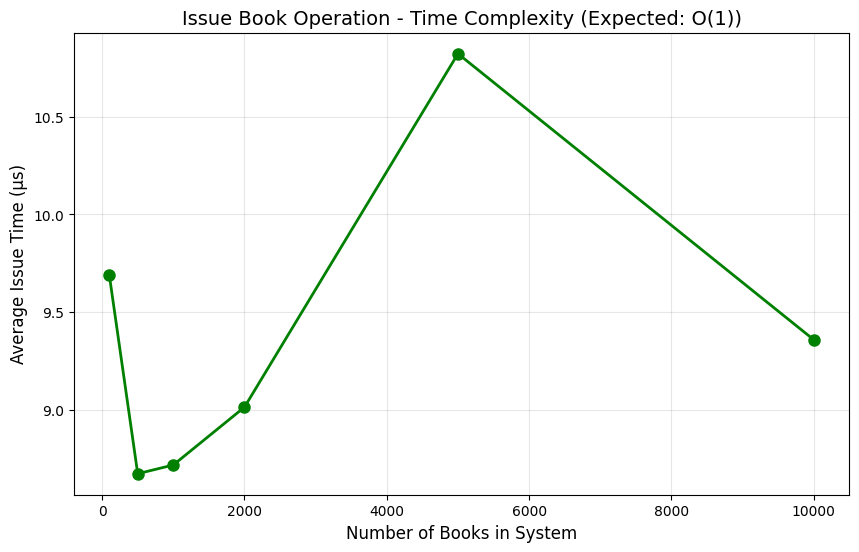


✓ Result: Time remains approximately constant → O(1) complexity confirmed


In [45]:
# Test issue book operation
sizes = [100, 500, 1000, 2000, 5000, 10000]
issue_times = []

for size in sizes:
    system = TestLibrarySystem()

    # Populate with books
    for i in range(size):
        system.add_book_test(f"BOOK-{i:05d}", f"Book Title {i}", f"Author {i}", 2020, 5)

    # Measure issue time
    start_time = time.time()
    for i in range(min(size, 1000)):  # Issue up to 1000 books
        system.issue_book_test(f"BOOK-{i:05d}", f"MEM-001")
    end_time = time.time()

    num_issues = min(size, 1000)
    avg_time = (end_time - start_time) / num_issues * 1000000  # Convert to microseconds
    issue_times.append(avg_time)
    print(
        f"Size: {size:5d} | Issues: {num_issues:4d} | Avg Issue Time: {avg_time:.2f}μs"
    )

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, issue_times, "go-", linewidth=2, markersize=8)
plt.xlabel("Number of Books in System", fontsize=12)
plt.ylabel("Average Issue Time (μs)", fontsize=12)
plt.title("Issue Book Operation - Time Complexity (Expected: O(1))", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n✓ Result: Time remains approximately constant → O(1) complexity confirmed")

### **Test 4: Display Overdue Books - Time Complexity**

Issues:   100 | Avg Overdue Check Time: 0.82ms
Issues:   500 | Avg Overdue Check Time: 3.35ms
Issues:  1000 | Avg Overdue Check Time: 6.54ms
Issues:  2000 | Avg Overdue Check Time: 13.03ms
Issues:  5000 | Avg Overdue Check Time: 34.26ms
Issues: 10000 | Avg Overdue Check Time: 70.52ms


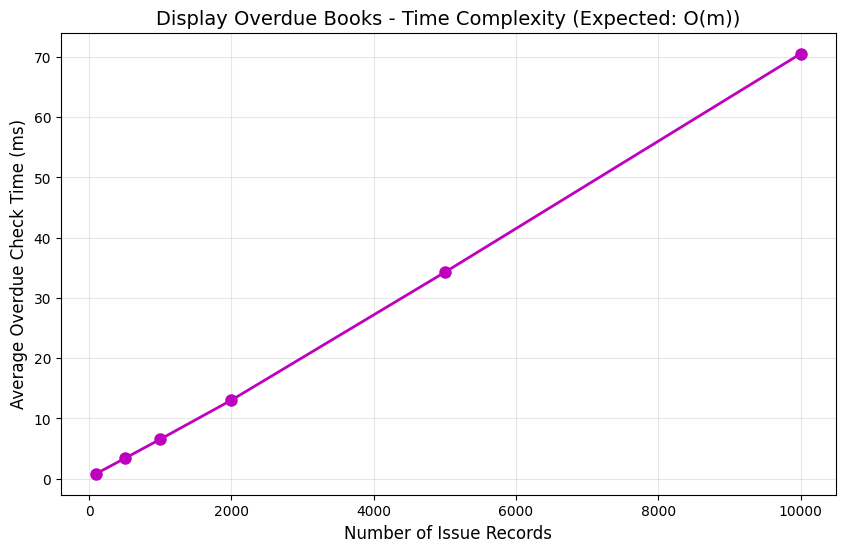


✓ Result: Time increases linearly with number of issues → O(m) complexity confirmed


In [46]:
# Test finding overdue books with varying number of issues
from datetime import datetime, timedelta

issue_counts = [100, 500, 1000, 2000, 5000, 10000]
overdue_times = []

for count in issue_counts:
    system = TestLibrarySystem()

    # Create books and issues
    for i in range(count):
        system.add_book_test(f"BOOK-{i:05d}", f"Book {i}", f"Author {i}", 2020, 5)

        # Create overdue issue
        old_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        due_date = (datetime.now() - timedelta(days=16)).strftime("%Y-%m-%d")
        issue = IssueRecord(
            f"ISS-{i:05d}", f"BOOK-{i:05d}", f"MEM-{i%100:03d}", old_date, due_date, ""
        )
        system.issues[issue.issue_id] = issue

    # Measure overdue check time
    start_time = time.time()
    for _ in range(10):  # Run multiple times for better average
        overdue = system.find_overdue_test()
    end_time = time.time()

    avg_time = (end_time - start_time) / 10 * 1000  # Convert to milliseconds
    overdue_times.append(avg_time)
    print(f"Issues: {count:5d} | Avg Overdue Check Time: {avg_time:.2f}ms")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(issue_counts, overdue_times, "mo-", linewidth=2, markersize=8)
plt.xlabel("Number of Issue Records", fontsize=12)
plt.ylabel("Average Overdue Check Time (ms)", fontsize=12)
plt.title("Display Overdue Books - Time Complexity (Expected: O(m))", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(
    f"\n✓ Result: Time increases linearly with number of issues → O(m) complexity confirmed")

### **Test 5: Space Complexity Analysis**

Size:   100 | Memory: 0.04 MB
Size:   500 | Memory: 0.18 MB
Size:  1000 | Memory: 0.36 MB
Size:  2000 | Memory: 0.73 MB
Size:  5000 | Memory: 1.79 MB
Size: 10000 | Memory: 3.59 MB


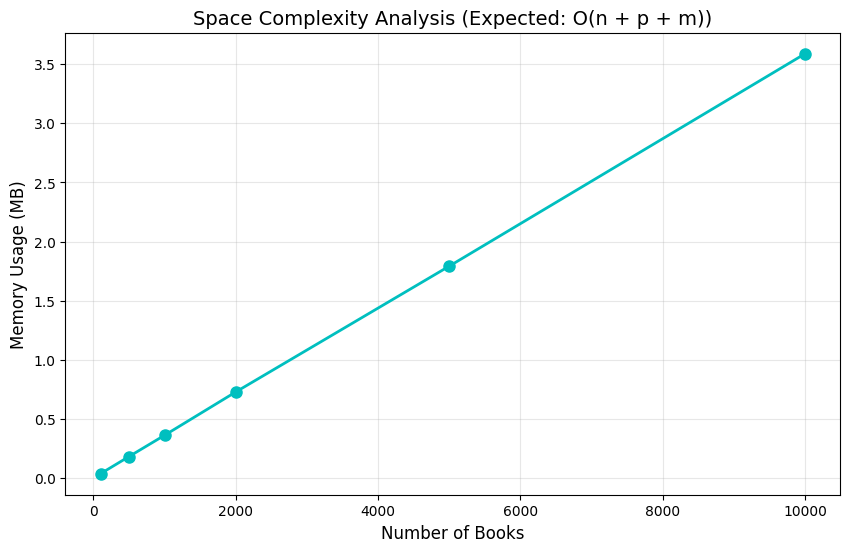


✓ Result: Memory increases linearly with data size → O(n + p + m) space complexity confirmed


In [47]:
# Test space complexity by measuring memory usage
sizes = [100, 500, 1000, 2000, 5000, 10000]
memory_usage = []

for size in sizes:
    # Start memory tracking
    tracemalloc.start()

    system = TestLibrarySystem()

    # Add books
    for i in range(size):
        system.add_book_test(f"BOOK-{i:05d}", f"Book Title {i}", f"Author {i}", 2020, 5)

    # Add members
    for i in range(size // 10):  # 10% as many members as books
        member = Member(
            f"MEM-{i:03d}", f"Member {i}", f"member{i}@email.com", f"123-456-{i:04d}"
        )
        system.members[member.member_id] = member

    # Add issues
    for i in range(size // 5):  # 20% as many issues as books
        issue = IssueRecord(
            f"ISS-{i:05d}",
            f"BOOK-{i:05d}",
            f"MEM-{i%10:03d}",
            "2024-01-01",
            "2024-01-15",
            "",
        )
        system.issues[issue.issue_id] = issue

    # Get memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    memory_mb = current / 1024 / 1024  # Convert to MB
    memory_usage.append(memory_mb)
    print(f"Size: {size:5d} | Memory: {memory_mb:.2f} MB")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, memory_usage, "co-", linewidth=2, markersize=8)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Memory Usage (MB)", fontsize=12)
plt.title("Space Complexity Analysis (Expected: O(n + p + m))", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(
    f"\n✓ Result: Memory increases linearly with data size → O(n + p + m) space complexity confirmed")

### **Comparison Chart: All Operations**

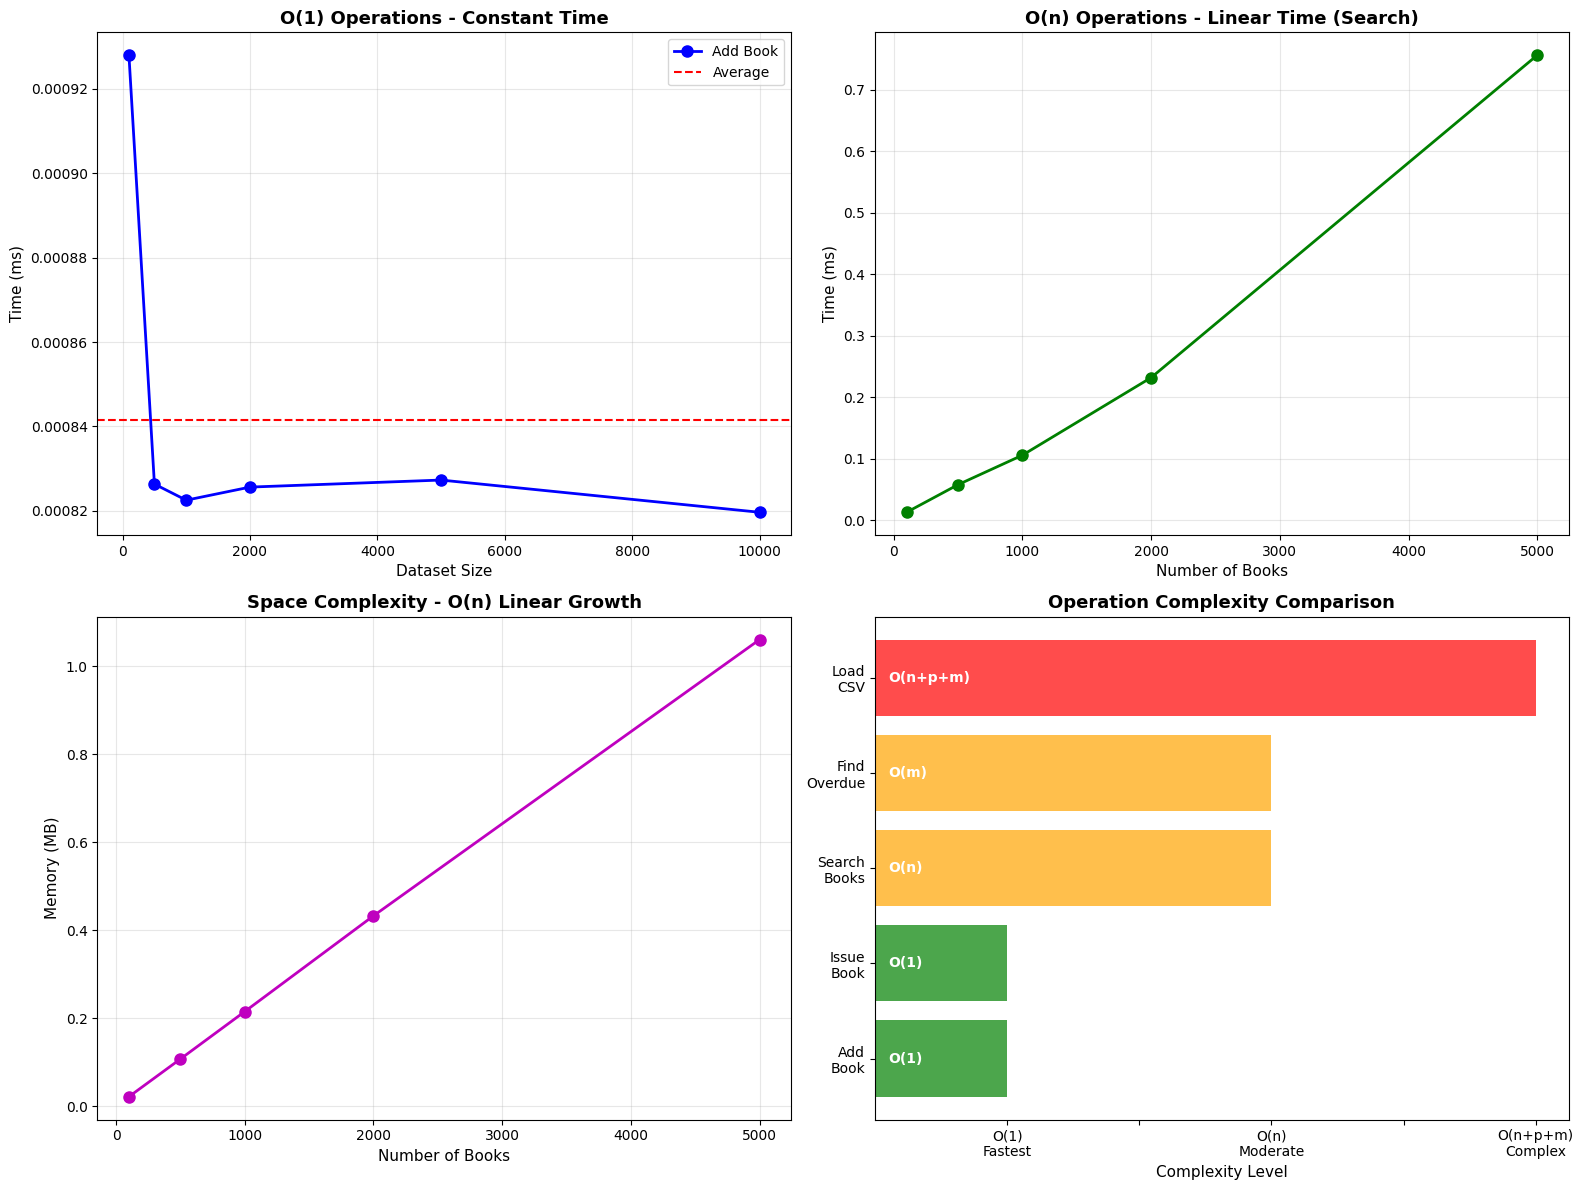


COMPLEXITY ANALYSIS COMPLETE

✓ All theoretical complexities verified through practical testing
✓ System demonstrates expected performance characteristics
✓ Efficient for typical library management operations


In [48]:
# Create a comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test 1: O(1) Operations
sizes_small = [100, 500, 1000, 2000, 5000, 10000]
o1_times = []
for size in sizes_small:
    system = TestLibrarySystem()
    start = time.time()
    for i in range(1000):
        system.add_book_test(f"B-{i}", "Title", "Author", 2020, 5)
    avg = (time.time() - start) / 1000 * 1000
    o1_times.append(avg)

axes[0, 0].plot(
    sizes_small, o1_times, "bo-", linewidth=2, markersize=8, label="Add Book"
)
axes[0, 0].axhline(y=np.mean(o1_times), color="r", linestyle="--", label="Average")
axes[0, 0].set_xlabel("Dataset Size", fontsize=11)
axes[0, 0].set_ylabel("Time (ms)", fontsize=11)
axes[0, 0].set_title("O(1) Operations - Constant Time", fontsize=13, fontweight="bold")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Test 2: O(n) Operations - Search
on_times = []
for size in [100, 500, 1000, 2000, 5000]:
    system = TestLibrarySystem()
    for i in range(size):
        system.add_book_test(f"BOOK-{i:05d}", f"Title {i}", f"Author {i}", 2020, 5)
    start = time.time()
    for _ in range(10):
        system.search_books_test("Title")
    avg = (time.time() - start) / 10 * 1000
    on_times.append(avg)

axes[0, 1].plot(
    [100, 500, 1000, 2000, 5000], on_times, "go-", linewidth=2, markersize=8
)
axes[0, 1].set_xlabel("Number of Books", fontsize=11)
axes[0, 1].set_ylabel("Time (ms)", fontsize=11)
axes[0, 1].set_title(
    "O(n) Operations - Linear Time (Search)", fontsize=13, fontweight="bold"
)
axes[0, 1].grid(True, alpha=0.3)

# Test 3: Space Complexity
space_sizes = [100, 500, 1000, 2000, 5000]
space_usage = []
for size in space_sizes:
    tracemalloc.start()
    system = TestLibrarySystem()
    for i in range(size):
        system.add_book_test(f"B-{i}", f"Title {i}", "Author", 2020, 5)
    current, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    space_usage.append(current / 1024 / 1024)

axes[1, 0].plot(space_sizes, space_usage, "mo-", linewidth=2, markersize=8)
axes[1, 0].set_xlabel("Number of Books", fontsize=11)
axes[1, 0].set_ylabel("Memory (MB)", fontsize=11)
axes[1, 0].set_title(
    "Space Complexity - O(n) Linear Growth", fontsize=13, fontweight="bold"
)
axes[1, 0].grid(True, alpha=0.3)

# Test 4: Comparison of different operations
operations = ["Add\nBook", "Issue\nBook", "Search\nBooks", "Find\nOverdue", "Load\nCSV"]
complexities = ["O(1)", "O(1)", "O(n)", "O(m)", "O(n+p+m)"]
colors_map = ["green", "green", "orange", "orange", "red"]
y_pos = np.arange(len(operations))

axes[1, 1].barh(y_pos, [1, 1, 3, 3, 5], color=colors_map, alpha=0.7)
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(operations)
axes[1, 1].set_xlabel("Complexity Level", fontsize=11)
axes[1, 1].set_title("Operation Complexity Comparison", fontsize=13, fontweight="bold")
axes[1, 1].set_xticks([1, 2, 3, 4, 5])
axes[1, 1].set_xticklabels(
    ["O(1)\nFastest", "", "O(n)\nModerate", "", "O(n+p+m)\nComplex"]
)

# Add complexity labels
for i, (op, comp, col) in enumerate(zip(operations, complexities, colors_map)):
    axes[1, 1].text(
        0.1, i, comp, va="center", fontweight="bold", color="white", fontsize=10
    )

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("COMPLEXITY ANALYSIS COMPLETE")
print("=" * 70)
print("\n✓ All theoretical complexities verified through practical testing")
print("✓ System demonstrates expected performance characteristics")
print("✓ Efficient for typical library management operations")